In [1]:
import scripts.framework as fr
import scripts.headrpp_alg as headrpp
import scripts.dijkstra_alg as dijkstra

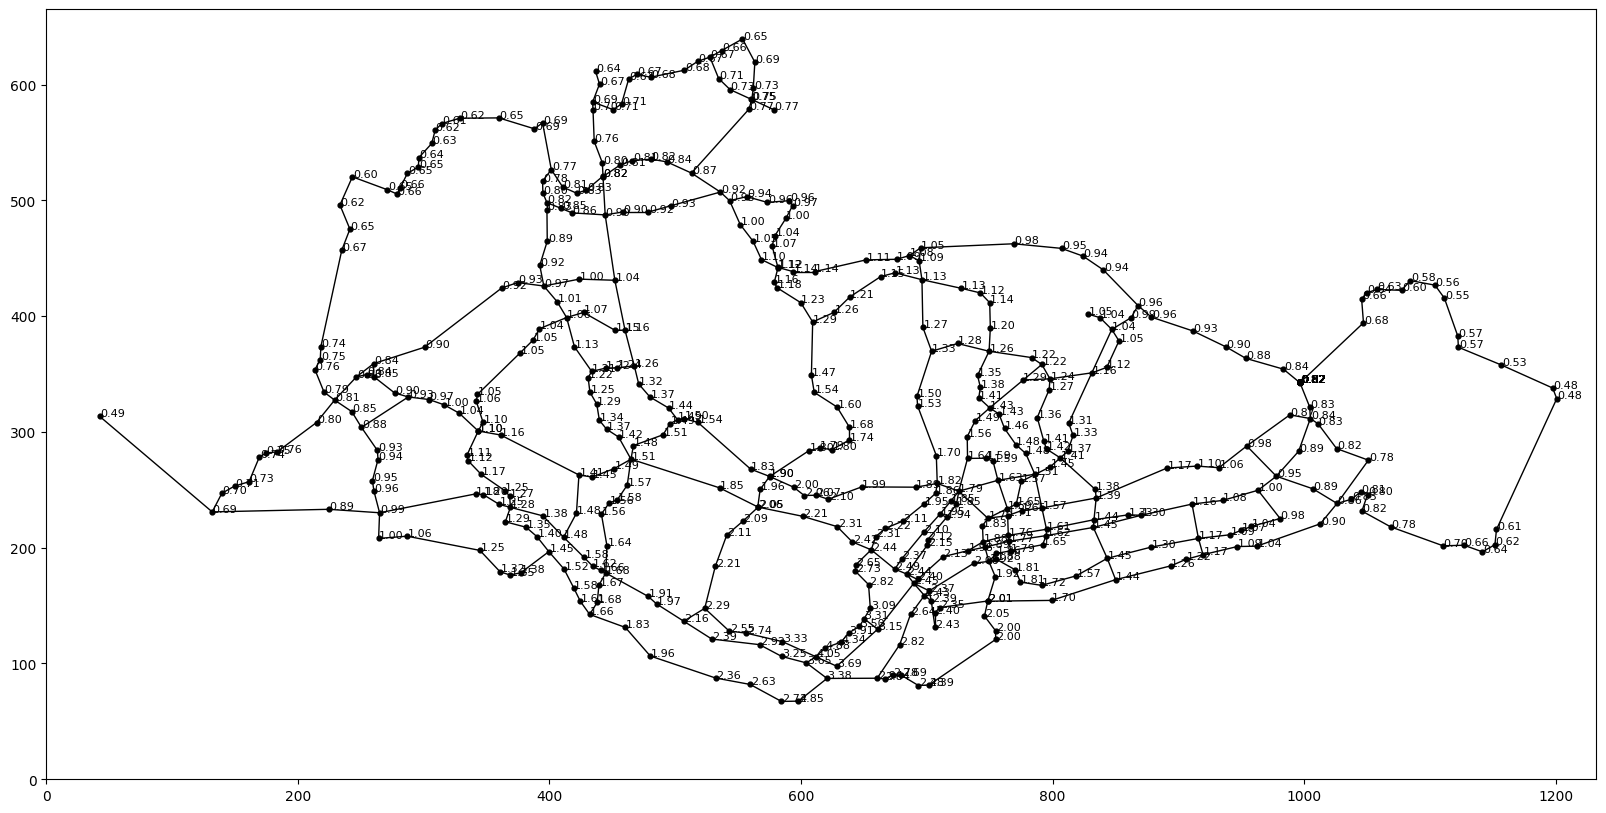

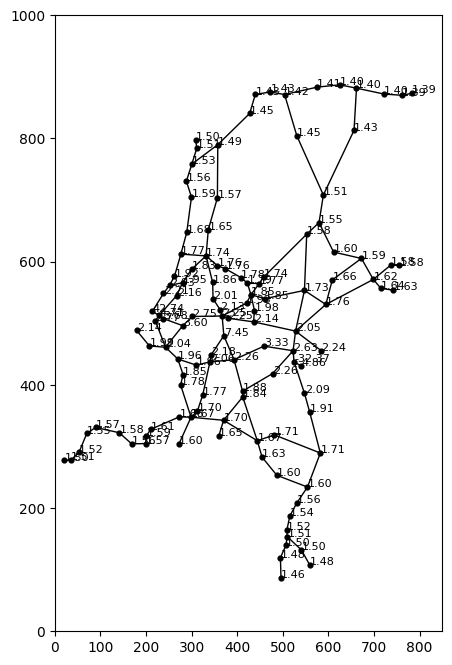

In [2]:
repr_sp = fr.Representation("./data/nodes_sp.csv", "./data/edges_sp.csv", maptype="sp")
repr_sp.plot_map(plot_nodes=True)

repr_nl = fr.Representation("./data/nodes_nl.csv", "./data/edges_nl.csv", maptype="nl")
repr_nl.plot_map(plot_nodes=True)

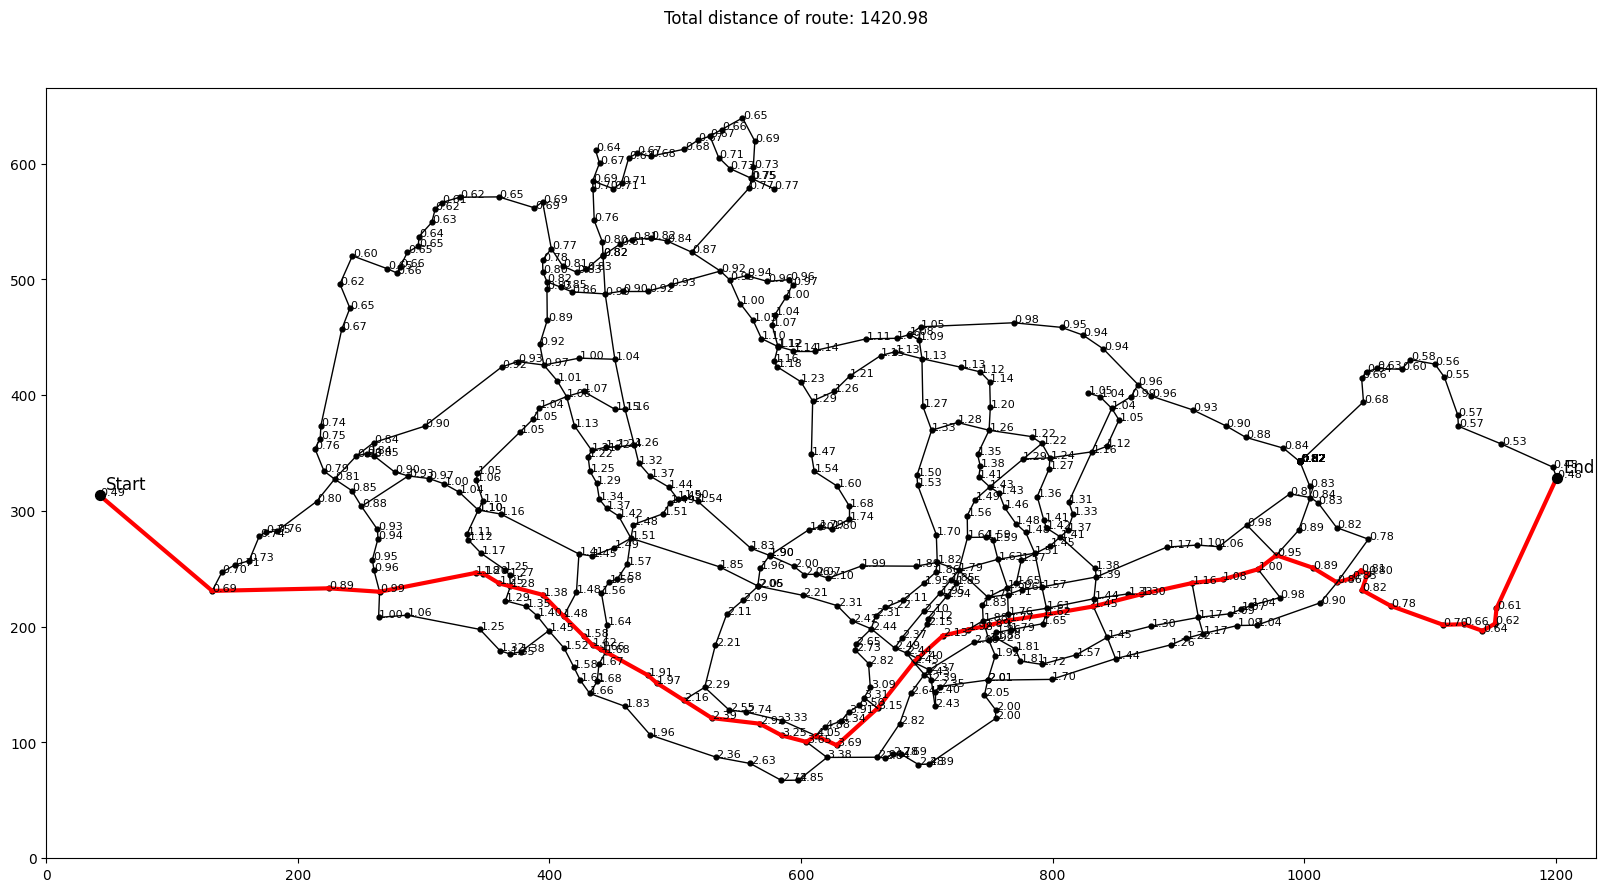

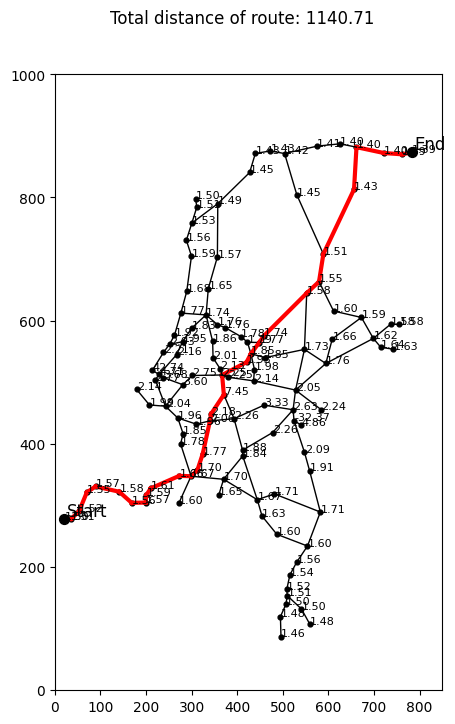

In [3]:
alg = dijkstra.DIJKSTRA(repr_sp, 22, 434)
route, cost = alg.run_algorithm(show_results=True)

alg = dijkstra.DIJKSTRA(repr_nl, 0, 110)
route, cost = alg.run_algorithm(show_results=True)

In [4]:
nr_generations = 200
weights = [0.05, 0.9, 0.05] # distance, traffic, pollution

pop_size_sg = 50
alg = headrpp.HEADRPP(repr_sp, nr_generations, 22, 434, pop_size_sg, weights)
results = alg.run_algorithm(show_results=True, save_name="images/singapore")
repr_sp.plot_map(results[1], plot_nodes=True)

pop_size_nl = 10
alg = headrpp.HEADRPP(repr_nl, nr_generations, 0, 110, pop_size_nl, weights)
results = alg.run_algorithm(show_results=True, save_name="images/netherlands")
repr_nl.plot_map(results[1], plot_nodes=True)

 10%|█         | 20/200 [00:04<00:31,  5.67it/s]

: 